In [ ]:
!pip install kaggle

In [1]:
# 다운받아놓은 json파일 가져오기
# api키를 통해 데이터셋을 가져오기 위함이다. 직접 다운받아 업로드한다면 필요없는 코드
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# 캐글 폴더 삭제하기(기존의 폴더)
# !rm -rf ~/.kaggle

In [2]:
import os
import shutil

# 폴더 만들기
# root : 리눅스시스템의 최상위 디렉토리
# exist_ok = True : 이미 존재하는 디렉토리를 만들려고 할 때 오류가 발생하지 않음
os.makedirs('/root/.kaggle', exist_ok=True)
path = os.getcwd()
print(path)

# 파일을 복사
if os.path.exists(os.path.join(path, 'kaggle.json')):
    src = os.path.join(path,'kaggle.json')
    dst = os.path.join('/root/.kaggle','kaggle.json')
    shutil.copy(src, dst)
    print('파일 복사 완료')

/content
파일 복사 완료


In [5]:
# 업로드하는건 매번 해줘야 함
# copy api key to kaggle directory
! chmod 700 /root/.kaggle/kaggle.json
# 보안상 API 키 파일인 kaggle.json에 대해 다른 사용자들이 접근하지 못하도록 하는 일반적인 권장 사항

# 폴더 내 파일 목록 확인
!ls -al /root/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Sep 26 23:04 .
drwx------ 1 root root 4096 Sep 26 23:04 ..
-rwx------ 1 root root   68 Sep 26 23:04 kaggle.json


In [ ]:
# ! kaggle datasets list

In [6]:
# 다운로드받기
# 데이터에 따라서 약정 accept를 해야하는 경우도 있음
! kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 116MB/s]
100% 812M/812M [00:07<00:00, 108MB/s]


In [ ]:
# 현재 경로의 파일 확인
# ! ls

In [ ]:
# https://drive.google.com/file/d/1TAXL6bbZf-ro36hlu4KnKmwxUR4DrBno/view?usp=drive_link

In [ ]:
# 구글드라이브에 있는 파일 가져오기
# id와 output 넣기
# import gdown
# gdown.download(id = '1TAXL6bbZf-ro36hlu4KnKmwxUR4DrBno', output = 'requirements.txt')

In [ ]:
# 압출파일을 푸는 방법이 2가지 있는데
# !unzip 리눅스 명령어는 대용량의 데이터를 빠르게 압축풀때 좋고
# zipfile 모듈을 사용하는 방법은 파이썬 코드와의 통합이 수월하지만 좀 느릴 수 있다.

In [18]:
# 압축파일 풀기1 : 하위 폴더 data에 풀기
# 원래는 압축을 풀어놓을 하위폴더는 미리 만들어야 하지만
# 코랩에서는 자동생성해줌
# !mkdir -p data
!unzip -qq dogs-vs-cats.zip -d data

In [19]:
# train.zip을 data/train에 풀었을 때, 하위폴더를 무시하고 파일만 상위 폴더로 이동
!unzip -qq data/train.zip -d data/train
!mv data/train/train/* data/train/  # train 폴더 안의 train 폴더 내용을 상위 폴더로 이동
!rmdir data/train/train  # 빈 폴더 삭제

# test1.zip을 data/test에 풀었을 때, 하위폴더를 무시하고 파일만 상위 폴더로 이동
!unzip -qq data/test1.zip -d data/test
!mv data/test/test1/* data/test/  # test 폴더 안의 test1 폴더 내용을 상위 폴더로 이동
!rmdir data/test/test1  # 빈 폴더 삭제

In [26]:
# 각 데이터 폴더의 경로 설정
data = os.path.join(path, 'data')
train_data = os.path.join(data, 'train')
test_data = os.path.join(data, 'test')

In [24]:
# ! rm -rf data

In [20]:
# 데이터폴더의 파일확인하기
! ls data

sampleSubmission.csv  test  test1.zip  train  train.zip


In [9]:
# # 압축파일 풀기 2

# import zipfile

# data = os.path.join(path, 'data')
# train_data = os.path.join(data, 'train')
# test_data = os.path.join(data, 'test1')

# # file_name = 'dataset.zip'
# # oupput_dir = 'dataset/dataset'

# zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
# zip_file.extractall(path = data)
# zip_file.close()

# zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
# zip_file.extractall(path = data)
# zip_file.close()

In [ ]:
# os.listdir(train_data)

['cat.2732.jpg',
 'dog.998.jpg',
 'dog.6851.jpg',
 'dog.7429.jpg',
 'cat.8960.jpg',
 'dog.8047.jpg',
 'dog.4244.jpg',
 'cat.4058.jpg',
 'dog.8145.jpg',
 'dog.5632.jpg',
 'cat.12161.jpg',
 'cat.2961.jpg',
 'dog.320.jpg',
 'cat.250.jpg',
 'cat.6234.jpg',
 'dog.3437.jpg',
 'cat.4787.jpg',
 'cat.4410.jpg',
 'cat.8405.jpg',
 'dog.4657.jpg',
 'dog.6166.jpg',
 'dog.2662.jpg',
 'cat.2085.jpg',
 'dog.2189.jpg',
 'dog.1318.jpg',
 'dog.6198.jpg',
 'dog.4252.jpg',
 'cat.6337.jpg',
 'cat.4390.jpg',
 'cat.9533.jpg',
 'dog.2572.jpg',
 'cat.5445.jpg',
 'cat.3717.jpg',
 'dog.211.jpg',
 'cat.1458.jpg',
 'dog.9784.jpg',
 'dog.1803.jpg',
 'cat.8143.jpg',
 'cat.1650.jpg',
 'dog.5108.jpg',
 'dog.740.jpg',
 'dog.1930.jpg',
 'cat.9279.jpg',
 'cat.8017.jpg',
 'cat.1384.jpg',
 'cat.6163.jpg',
 'dog.11071.jpg',
 'cat.1688.jpg',
 'dog.274.jpg',
 'dog.1400.jpg',
 'cat.11663.jpg',
 'cat.1318.jpg',
 'cat.7419.jpg',
 'dog.9778.jpg',
 'cat.11388.jpg',
 'cat.758.jpg',
 'dog.11634.jpg',
 'cat.9310.jpg',
 'cat.2564.jpg',

In [ ]:
# ! rm -rf data/train/train
# ! rm -rf data/test1/test1

In [22]:
# 데이터의 갯수
trainFiles = os.listdir(train_data)
testFiles = os.listdir(test_data)
print(len(trainFiles))
print(len(testFiles))

25000
12500


In [25]:
trainFiles[0]

'dog.7220.jpg'

In [ ]:
import random

num = random.randint(0,len(trainFiles))
trainFiles[num]

'dog.2186.jpg'

In [27]:
# cat : 125000 dog : 12500이 맞는지 확인

cat = 0
dog = 0
for file in trainFiles:
    animal = file.split('.')
    if animal[0] == 'cat':
        cat += 1
    elif animal[0] == 'dog':
        dog += 1


print(cat)
print(dog)


12500
12500


In [ ]:
# 이미지 분류 레이블을 만드는 방법
# 방법 1은 폴더로 클래스를 나누는 방법 : 폴더명을 레이블로 사용하는 방법
# 방법 2는 csv 파일을 만든다. csv 파일의 컬럼 2개 (column1 : 파일명 / columns2 : 레이블)

# 신경망에 넣을 때는 숫자가 문자열보다 편하므로 레이블도 숫자로 해준다.
# cat : 0 / dog : 1

# 훈련데이터는 25000장이지만 연습시에는 4000장만 써본다(고양이 2000장/강아지 2000장)
# TRAIN : 1000/1000 + VALID : 500/500 + TEST : 500/500

In [ ]:
# 스몰 데이터셋 폴더 삭제
! rm -rf sdata

In [28]:
# small dataset 4000장을 위한 폴더를 지정하고 거기에 4000장을 나눠서 보관하기

# 폴더명(경로)
sdata = 'sdata'
train_sdata = os.path.join(sdata, 'train')
valid_sdata = os.path.join(sdata, 'valid')
test_sdata = os.path.join(sdata, 'test')

# 폴더만들기
os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

# 하위 폴더 만들기(train)
train_sdata_dog = os.path.join(train_sdata, 'dog')
train_sdata_cat = os.path.join(train_sdata, 'cat')
os.makedirs(train_sdata_dog, exist_ok=True)
os.makedirs(train_sdata_cat, exist_ok=True)


# 하위 폴더 만들기(valid)
valid_sdata_dog = os.path.join(valid_sdata, 'dog')
valid_sdata_cat = os.path.join(valid_sdata, 'cat')
os.makedirs(valid_sdata_dog, exist_ok=True)
os.makedirs(valid_sdata_cat, exist_ok=True)


# 하위 폴더 만들기(test)
test_sdata_dog = os.path.join(test_sdata, 'dog')
test_sdata_cat = os.path.join(test_sdata, 'cat')
os.makedirs(test_sdata_dog, exist_ok=True)
os.makedirs(test_sdata_cat, exist_ok=True)

In [ ]:
# dog.0.jpg ~ dog.1999.jpg
# cat.0.jpg ~ cat.1999.jpg 파일들이 다 있는가

# 존재한다면 리스트로 만들어주기

dogList = []
catList = []

for i in range(2000):
    dogList.append('dog.'+str(i)+'.jpg')
    catList.append('cat.'+str(i)+'.jpg')

In [ ]:
# dogList[:999], dogList[1000:1499], dogList[1500:2000]

In [ ]:
# catList[:999], catList[1000:1499], catList[1500:2000]

In [ ]:
# from os.path import split
# # 클래스별로 이미지를 1000:500:500으로 나눠서 복사
# classes = ['dog','cat'] # 클래스가 많아지면 리스트에 담아주는 것이 좋다.

In [31]:
# 한 클래스의 이미지 * 2
# 이미지 데이터 레이블로 가져올 이미지 범위 정하기
train_num = 4000
valid_num = 1000
test_num  = 1000

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]
test_range  = [train_num + valid_num, train_num + valid_num + test_num-1]

print(train_range)
print(valid_range)
print(test_range)

[0, 3999]
[4000, 4999]
[5000, 5999]


In [32]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정 (데이터셋이 저장된 경로로 수정하세요)
dataset_dir = 'data/train'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata'

# 클래스 목록
classes = ['dog', 'cat']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))
    # create_dir(os.path.join(test_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            # print(f"Copying {src_path} to {dst_path}")
            shutil.copy(src_path, dst_path)
        # else:
            # print(f"File not found: {src_path}")

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~999)
    copy_images(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls), cls)

    # valid dataset 구성
    copy_images(valid_range[0], valid_range[1], dataset_dir, os.path.join(valid_dir, cls), cls)

    # test dataset 구성
    copy_images(test_range[0], test_range[1], dataset_dir, os.path.join(test_dir, cls), cls)
# File not found: path_to_your_dogs_vs_cats_dataset/data/train/dog.140.jpg
print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [33]:
# 위에서 복삳왼 파일들 갯수 확인하기

train_cat = os.listdir(os.path.join(train_dir,'cat'))
train_dog = os.listdir(os.path.join(train_dir,'dog'))
valid_cat = os.listdir(os.path.join(valid_dir,'cat'))
valid_dog = os.listdir(os.path.join(valid_dir,'dog'))
test_cat = os.listdir(os.path.join(test_dir,'cat'))
test_dog = os.listdir(os.path.join(test_dir,'dog'))

In [37]:
file = os.listdir(os.path.join(test_dir))
print(file[0])

dog


In [35]:
len(train_cat), len(train_dog), len(valid_cat), len(valid_dog), len(test_cat), len(test_dog)

(4000, 4000, 1000, 1000, 1000, 1000)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
# 이미지 4000장을 customDataset 클래스를 만들어서 사용
class customDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files  #파일 목록
        self.root_dir = root_dir    #경로
        self.mode = mode    # train/test 모드 설정
        self.transform = transform

        # 레이블 생성 cat=0, dog=1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array([self.label])

        else:
            return img, self.files[idx]


array([[[ 10,  44,  68],
        [ 10,  44,  68],
        [  0,  28,  53],
        ...,
        [ 47,  57,  67],
        [ 23,  33,  43],
        [ 21,  30,  40]],

       [[ 11,  45,  69],
        [ 10,  44,  68],
        [  0,  29,  54],
        ...,
        [ 44,  54,  64],
        [ 20,  30,  40],
        [ 18,  27,  37]],

       [[ 12,  46,  70],
        [ 11,  45,  69],
        [  0,  29,  54],
        ...,
        [ 46,  57,  65],
        [ 22,  33,  41],
        [ 21,  30,  39]],

       ...,

       [[ 85,  83,  89],
        [ 90,  88,  94],
        [ 96,  94, 100],
        ...,
        [ 48,  42,  43],
        [ 48,  42,  43],
        [ 46,  40,  41]],

       [[ 78,  76,  82],
        [ 81,  79,  85],
        [ 86,  84,  90],
        ...,
        [ 48,  42,  43],
        [ 48,  42,  43],
        [ 46,  40,  41]],

       [[ 76,  74,  80],
        [ 77,  75,  81],
        [ 81,  79,  85],
        ...,
        [ 48,  41,  44],
        [ 48,  41,  44],
        [ 46,  39,  42]]], dtype=uint8)
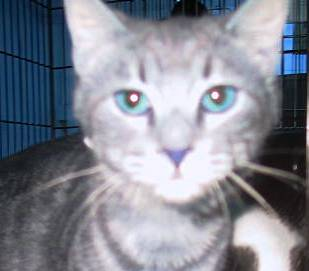

In [36]:
import cv2
img = cv2.imread(os.path.join(os.path.join(train_dir, 'cat' ,train_cat[200])))
img

In [ ]:
# 이미지 전처리

from torchvision import transforms
from PIL import Image

org_size = (256,256)
img_size = 224
train_transform = transforms.Compose([
    # 이미지 사이즈가 파일마다 제각각이기 때문에 통일시켜준다.
    transforms.Resize(org_size),    # 신경망에 넣으려면 정사각형으로
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),    # 원본 이미지보다 조금 작게 설정한다.
    transforms.ToTensor(),
    # 평균이 0.5 표준편차가 0.5
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)), # 데이터셋의 특성을 잘 모를때는 0과 1사이값인 0.5로 일단 주자
])

# valid와 test는 데이터 증식하지 않음
# 리사이즈와 정규화만 한다.
test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)), # 데이터셋의 특성을 잘 모를때는 0과 1사이값인 0.5로 일단 주자
])

In [ ]:
# 데이터셋 인스턴스화

# 인수값 : 파일목록, 파일경로, 모드, transforms
train_dog_dataset = customDataset(train_dog, os.path.join(train_dir,'dog'), 'train', transform = train_transform)
train_cat_dataset = customDataset(train_cat, os.path.join(train_dir,'cat'), 'train', transform = train_transform)

# valid 데이터도 레이블이 필요하기 때문에 train 모드로 받아와야 함
valid_dog_dataset = customDataset(valid_dog, os.path.join(valid_dir,'dog'), 'train', transform = test_transform)
valid_cat_dataset = customDataset(valid_cat, os.path.join(valid_dir,'cat'), 'train', transform = test_transform)

test_dog_dataset = customDataset(test_dog, os.path.join(test_dir), 'test', transform = test_transform)
test_cat_dataset = customDataset(test_cat, os.path.join(test_dir), 'test', transform = test_transform)

from torch.utils.data import ConcatDataset
train_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = ConcatDataset([valid_dog_dataset, valid_cat_dataset])
test_dataset = ConcatDataset([test_dog_dataset, test_cat_dataset])

In [ ]:
# 데이터로더 객체생성

from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
# for idx, (img, label) in enumerate(train_loader):
#     print(idx, img.shape, label)

# for idx, (img, label) in enumerate(train_loader):
#     if not isinstance(img, Image.Image):
#         print(f"Image at index {idx} is not a valid PIL image: {type(img)}")

### 시각화할때는 transforms.Normalize 한 것 주석처리하자

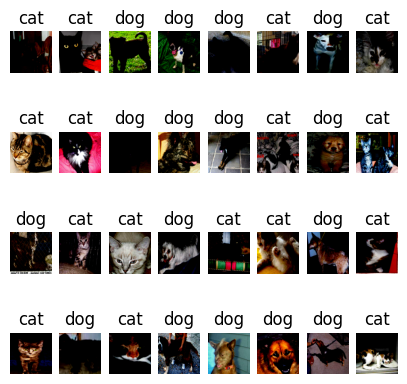

In [ ]:
import matplotlib.pyplot as plt
img, label = next(iter(train_loader))
img.shape, label.shape

classes = {0: 'cat', 1:'dog'}

fig = plt.figure(figsize=(5,5))
for i in range(batch_size):
    # 4행 8열
    ax = fig.add_subplot(4,8,i+1)
    ax.set_title(classes[label[i].item()])
    ax.axis('off')
    ax.imshow(img[i].permute(1,2,0))    #컬러 채널 순서를 재정렬




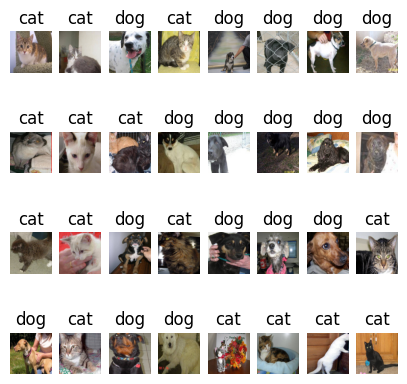

In [ ]:
# 디바이스 정의 / 모델정의

# imagenet에서 사전학습된 모델을 가져와서 학습(train)
import torch
from torchvision import models

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

model = models.resnet50(pretrained=True).to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size = (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]           4,096
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]          16,384
      BatchNorm2d-12          [-1, 256, 64, 64]             512
           Conv2d-13          [-1, 256, 64, 64]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력

# ResNet 모델의 마지막 fc 레이어의 입력 크기를 가져오기
num_features = model.fc.in_features

# 이진분류 (binary classifier)
# 최종출력 노드의 갯수 : 1개(0 또는 1 0.2가 나오면 0이랑 가까운것)
# sigmoid()

# 다중분류 (multi-label classifier)
# 최종 출력 노드의 갯수 : 2개([0.8,0.2],[0.3,0.7])
# softmax()


# 모델의 마지막 레이어인 출력부를 수정
# 분류기는 2개로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 1),
    torch.nn.Sigmoid()
).to(device)

print(model)

summary(model, input_size = (3,256,256))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# for name, param in model.named_parameters():
#     print(f"Layer: {name} is on {param.device}")

In [ ]:
# # 학습진행
# import time

# def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
#     model.train()

#     train_loss = 0
#     train_acc = 0
#     train_correct = 0

#     # 그래프를 출력하기 위해 리스트에 누적
#     train_losses = []
#     train_accuracies = []
#     valid_losses = []
#     valid_accuracies = []


#     for epoch in range(epochs):
#         start = time.time()
#         # 1 epoch 중에 train에 해당하는 for 문
#         for train_x, train_y in train_loader:
#             model.train()
#             train_x, train_y = train_x.to(device), train_y.to(device).float()
#             # 기울기 초기화
#             optimizer.zero_grad()
#             # 예측
#             pred = model(train_x)
#             # 손실계산
#             loss = criterion(pred, train_y)
#             # 오차역전파
#             loss.backward()
#             # 진행
#             optimizer.step()

#             train_loss += loss.item()

#             # sigmoid
#             y_pred = pred.cpu()
#             y_pred[y_pred >= 0.5] = 1
#             y_pred[y_pred < 0.5] = 0
#             # y_pred와 train_y값이 같으면 train_correct 추가
#             train_correct += y_pred.eq(train_y.cpu()).int().sum()

#         # validation data check
#         valid_loss = 0
#         valid_acc = 0
#         valid_correct = 0

#         # 1 epoch 중에 validation에 해당하는 for 문
#         for valid_x, valid_y in valid_loader:
#             with torch.no_grad():
#                 model.eval()
#                 valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
#                 pred = model(valid_x)
#                 loss = criterion(pred, valid_y)
#             valid_loss += loss.item()

#             y_pred = pred.cpu()
#             y_pred[y_pred >= 0.5] = 1
#             y_pred[y_pred < 0.5] = 0
#             valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

#         train_acc = train_correct/len(train_loader.dataset)
#         valid_acc = valid_correct/len(valid_loader.dataset)

#         print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

#         train_losses.append(train_loss/len(train_loader))
#         train_accuracies.append(train_acc)
#         valid_losses.append(valid_loss/len(valid_loader))
#         valid_accuracies.append(valid_acc)

#         train_loss = 0
#         train_acc = 0
#         train_correct = 0

#     plt.plot(train_losses, label='loss')
#     plt.plot(train_accuracies, label='accuracy')
#     plt.legend()
#     plt.title('train loss and accuracy')
#     plt.show()

#     plt.plot(valid_losses, label='loss')
#     plt.plot(valid_accuracies, label='accuracy')
#     plt.legend()
#     plt.title('valid loss and accuracy')
#     plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def imshow(img):
    # 이미지 정규화를 해제하기 위해 역변환
    img = img / 2 + 0.5  # (0.5, 0.5, 0.5)로 정규화된 이미지일 경우
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    model.train()

    train_loss = 0
    train_acc = 0
    train_correct = 0

    # 그래프를 출력하기 위해 리스트에 누적
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    # 잘못 예측된 이미지를 저장할 리스트
    wrong_images = []
    wrong_labels = []
    wrong_preds = []

    for epoch in range(epochs):
        start = time.time()

        # tqdm을 사용하여 각 에포크의 진행률 표시
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", leave=False)

        # 1 epoch 중에 train에 해당하는 for 문
        for train_x, train_y in train_loader_tqdm:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            # 기울기 초기화
            optimizer.zero_grad()
            # 예측
            pred = model(train_x)
            # 손실계산
            loss = criterion(pred, train_y)
            # 오차역전파
            loss.backward()
            # 진행
            optimizer.step()

            train_loss += loss.item()

            # sigmoid
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            # y_pred와 train_y값이 같으면 train_correct 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        # tqdm을 사용하여 각 에포크의 validation 진행률 표시
        valid_loader_tqdm = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]", leave=False)

        # 1 epoch 중에 validation에 해당하는 for 문
        for valid_x, valid_y in valid_loader_tqdm:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()

            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

            # 잘못 예측한 이미지와 레이블 저장
            wrong_idx = (y_pred != valid_y.cpu()).nonzero(as_tuple=True)[0]
            for idx in wrong_idx:
                wrong_images.append(valid_x.cpu()[idx])  # 잘못 예측된 이미지
                wrong_labels.append(valid_y.cpu()[idx])  # 실제 라벨
                wrong_preds.append(y_pred[idx])          # 예측된 값

        train_acc = train_correct / len(train_loader.dataset)
        valid_acc = valid_correct / len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        train_loss = 0
        train_acc = 0
        train_correct = 0

    # 잘못 예측한 이미지를 시각화
    print(f"잘못 예측한 이미지 수: {len(wrong_images)}")

    # 최대 5개의 잘못 예측된 이미지를 시각화
    for i in range(min(5, len(wrong_images))):
        print(f"실제 라벨: {wrong_labels[i].item()}, 예측값: {wrong_preds[i].item()}")
        imshow(wrong_images[i])

    # 학습 및 검증 손실/정확도 시각화
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Valid Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(valid_accuracies, label='Valid Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.show()


124.610sec : [Epoch 1/15] -> train loss: 0.2101, train acc: 95.737% / valid loss: 0.0468, valid acc: 99.450%


123.329sec : [Epoch 2/15] -> train loss: 0.0364, train acc: 99.125% / valid loss: 0.0268, valid acc: 99.500%


123.136sec : [Epoch 3/15] -> train loss: 0.0192, train acc: 99.512% / valid loss: 0.0239, valid acc: 99.350%


122.673sec : [Epoch 4/15] -> train loss: 0.0136, train acc: 99.725% / valid loss: 0.0199, valid acc: 99.400%


122.864sec : [Epoch 5/15] -> train loss: 0.0077, train acc: 99.800% / valid loss: 0.0170, valid acc: 99.550%


122.306sec : [Epoch 6/15] -> train loss: 0.0062, train acc: 99.875% / valid loss: 0.0170, valid acc: 99.500%


122.093sec : [Epoch 7/15] -> train loss: 0.0045, train acc: 99.912% / valid loss: 0.0161, valid acc: 99.550%


122.069sec : [Epoch 8/15] -> train loss: 0.0036, train acc: 99.925% / valid loss: 0.0152, valid acc: 99.650%


123.881sec : [Epoch 9/15] -> train loss: 0.0031, train acc: 99.963% / valid loss: 0.0137, valid acc: 99.700%


124.336sec : [Epoch 10/15] -> train loss: 0.0037, train acc: 99.925% / valid loss: 0.0154, valid acc: 99.700%


123.500sec : [Epoch 11/15] -> train loss: 0.0020, train acc: 99.950% / valid loss: 0.0151, valid acc: 99.700%


123.588sec : [Epoch 12/15] -> train loss: 0.0014, train acc: 99.975% / valid loss: 0.0147, valid acc: 99.600%


122.172sec : [Epoch 13/15] -> train loss: 0.0042, train acc: 99.875% / valid loss: 0.0145, valid acc: 99.650%


122.922sec : [Epoch 14/15] -> train loss: 0.0010, train acc: 99.988% / valid loss: 0.0157, valid acc: 99.600%


121.624sec : [Epoch 15/15] -> train loss: 0.0009, train acc: 99.988% / valid loss: 0.0158, valid acc: 99.600%
잘못 예측한 이미지 수: 130
실제 라벨: 1.0, 예측값: 0.0


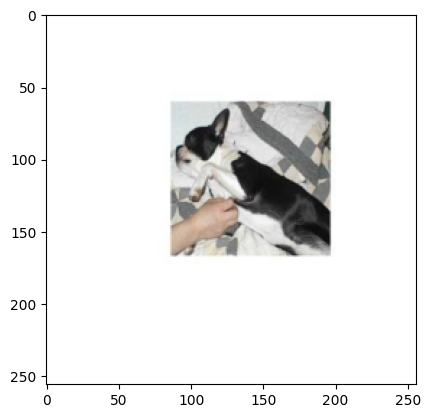

실제 라벨: 1.0, 예측값: 0.0


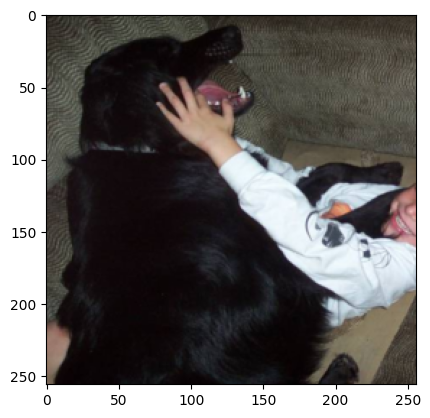

실제 라벨: 1.0, 예측값: 0.0


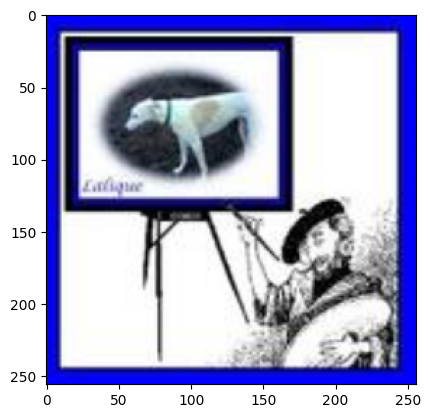

실제 라벨: 1.0, 예측값: 0.0


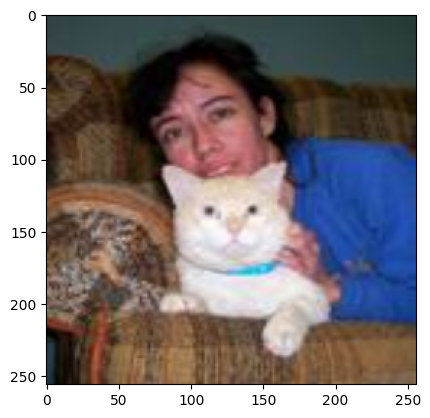

실제 라벨: 1.0, 예측값: 0.0


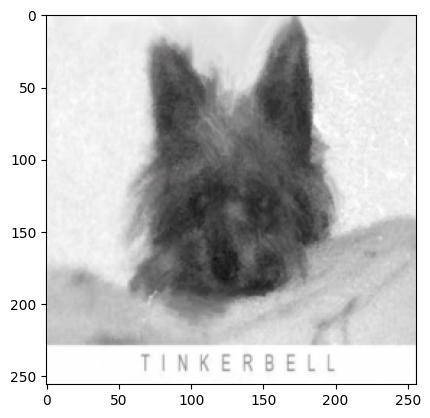

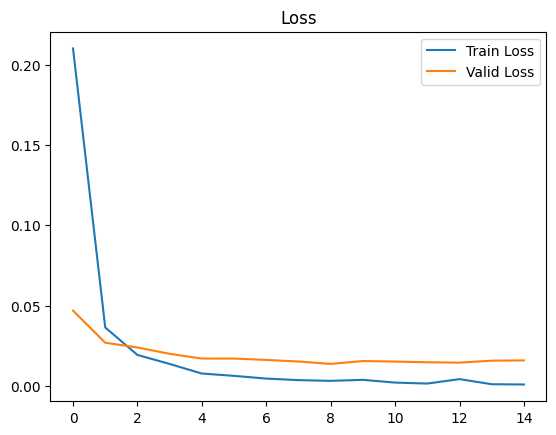

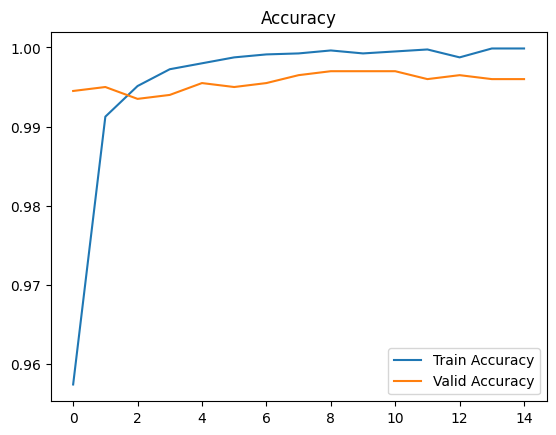

In [ ]:
lr = 0.00001
epochs = 15

# 손실함수 정의
# 신경망에 sigmoid를 썼으므로 BCELoss
# 만약 신경망에 softmax를 썼다면 CELoss
criterion = torch.nn.BCELoss()
# optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# 학습
fit(model, criterion, optimizer, epochs, train_loader, valid_loader)

### resnet50

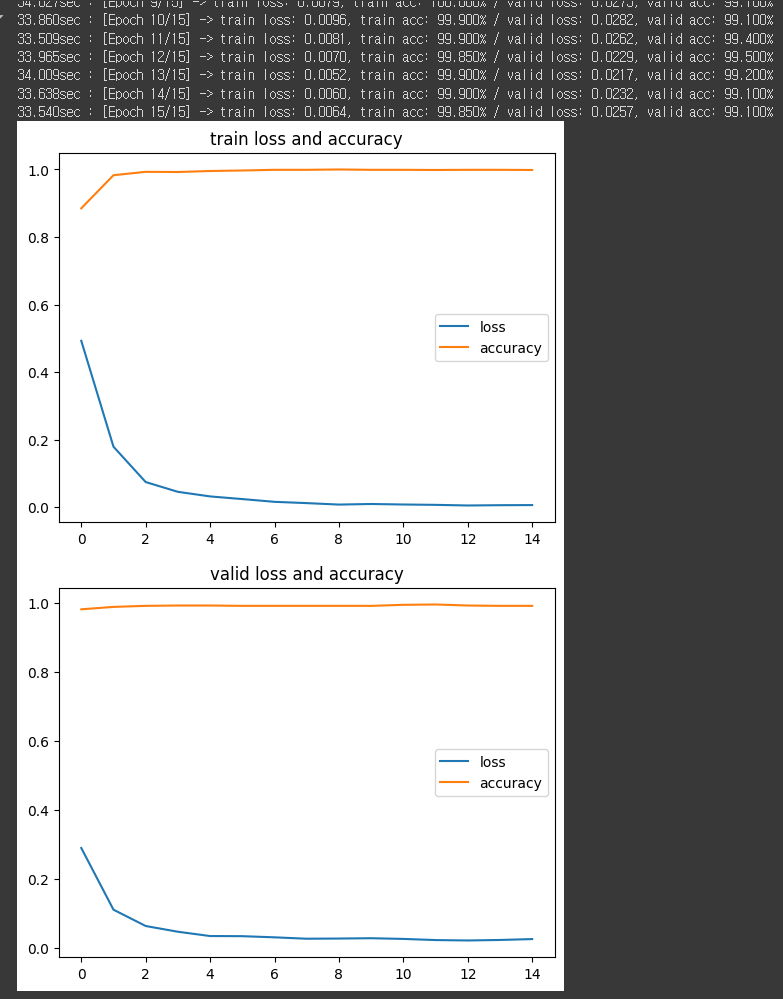

In [ ]:
# 오버피팅을 일부러 일으키고 싶을때는
# 드랍아웃 제거
# 그렇게 하면 상대적으로 오버피팅이 빨리 일어난다.

### resnet 50
### dropout 제거

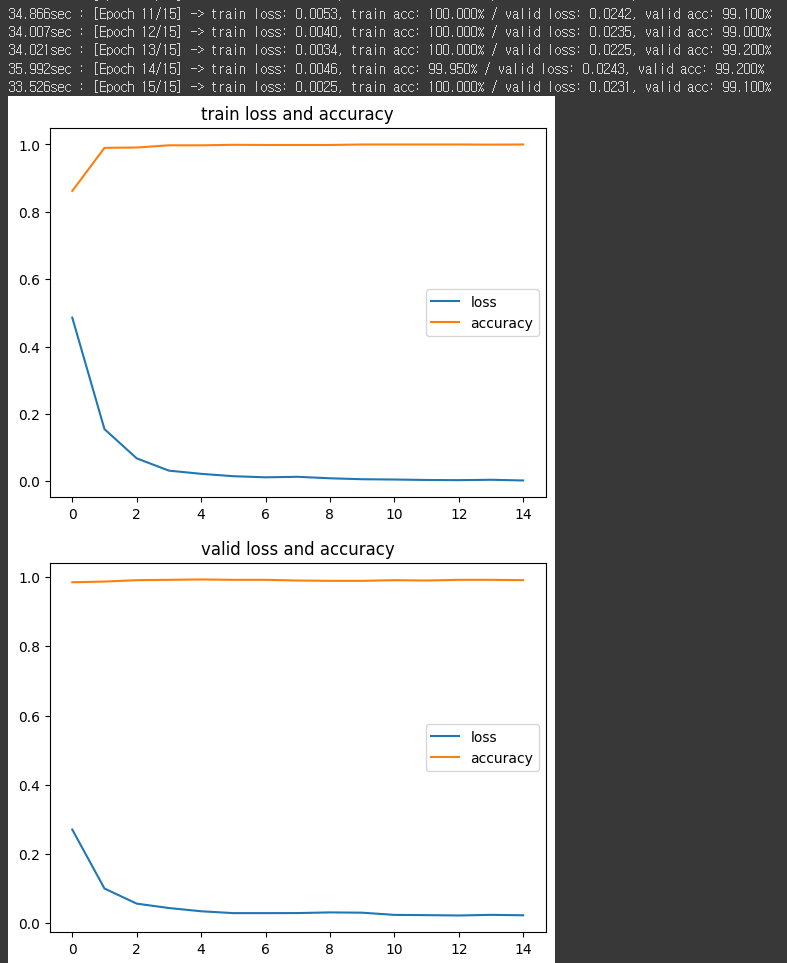